In [1]:
"""
Created on Mon Apr 24 10:21:12 2017

@author: Batul Zamin
"""

'\nCreated on Mon Apr 24 10:21:12 2017\n\n@author: Batul Zamin\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [3]:
data1 = pd.read_csv('datafile1.csv', names = ["X1", "X2", "y"])
data2 = pd.read_csv('datafile2.csv', names = ["X1", "X2", "y"])
data3 = pd.read_csv('datafile3.csv', names = ["X1", "X2", "y"])
data4 = pd.read_csv('datafile4.csv', names = ["X1", "X2", "y"])

## Study the four datasets

In [4]:
def scatter_plot(x, y):
    plt.figure()
    plt.scatter(x.X1, x.X2, color=['red'])
    plt.scatter(y.X1, y.X2, color=['blue'])
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Scatter plot of X1 v/s X2")
    plt.show()

In [5]:
def classify(data):
    data_1 = data[data.y==0]
    data_2 = data[data.y==1]
    return data_1, data_2

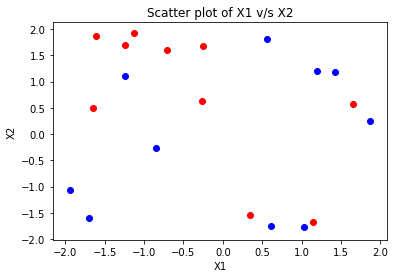

In [6]:
x, y = classify(data1)
scatter_plot(x, y)

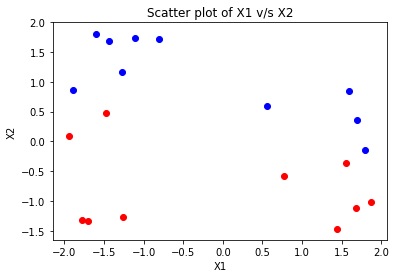

In [7]:
x, y = classify(data2)
scatter_plot(x, y)

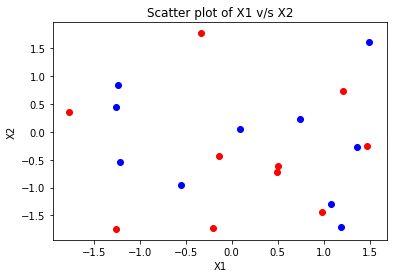

In [8]:
x, y = classify(data3)
scatter_plot(x, y)

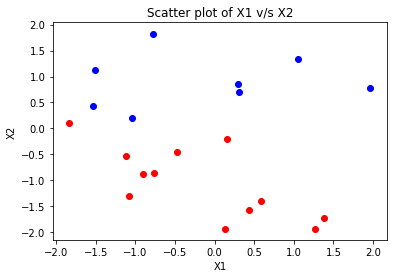

In [9]:
x, y = classify(data4)
scatter_plot(x, y)

## Gradient Descent

In [10]:
def get_data(data):
    w = np.random.rand(2)
    x1 = np.array(data.X1)
    x2 = np.array(data.X2)
    y = np.array(data.y)
    bias = np.random.rand(1)
    return x1, x2, w, y, bias

In [11]:
def perceptron_predict_gd(x1, x2, y, w1, w2, bias, lrate):
    y_hat = x1 * w1 + x2 * w2 + bias
    y_hat = [1 if y_hat[i] >= 0 else 0 for i in range(len(y_hat))]
    err = np.sum((y - y_hat)**2)
    count = 0
    while err != 0:
        if count > 100:
            break
        delta_w1 = lrate * np.dot(y - y_hat, x1.T)
        delta_w2 = lrate * np.dot(y - y_hat, x2.T)
        w1 = w1 + delta_w1
        w2 = w2 + delta_w2
        bias = bias + lrate * np.sum(y - y_hat)
        y_hat = x1 * w1 + x2 * w2 + bias
        y_hat = [1 if y_hat[i] >= 0 else 0 for i in range(len(y_hat))]
        err = np.sum((y - y_hat)**2)
        count += 1
    return w1, w2, bias, err, y_hat

In [12]:
def print_result(w1, w2, y_hat, err, bias):
    print("w1 : ", w1)
    print("w2 : ", w2)
    print("y_hat : ", y_hat)
    print("squared error : ", err)
    print("bias : ", bias)

In [13]:
def classify_plot(data, x1, x2, w1, w2, bias):
    x1min = x1.min()
    x1max = x2.max()
    x2min = (-bias - w1 * x1min) / w2
    x2max = (-bias - w1 * x1max) / w2
    plt.figure()
    plt.plot((x1min, x1max), (x2min, x2max))
    label = data.y
    plt.scatter(data.X1, data.X2, c=label, cmap="rainbow")
    plt.show()

## Predict and Classify

### Data-1

In [14]:
x1, x2, w, y, bias = get_data(data1)
w1, w2, bias, err, y_hat = perceptron_predict_gd(x1, x2, y, w[0], w[1], bias, 1)
print_result(w1, w2, y_hat, err, bias)

w1 :  4.27382591425
w2 :  -3.46662008748
y_hat :  [1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1]
squared error :  8
bias :  [ 1.22096577]


### Classification plot

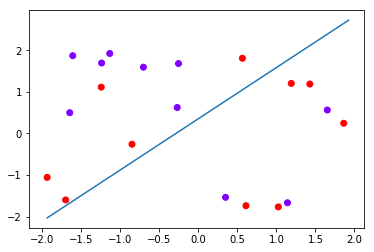

In [15]:
classify_plot(data1, x1, x2, w1, w2, bias)

### Data-2

In [16]:
x1, x2, w, y, bias = get_data(data2)
w1, w2, bias, err, y_hat = perceptron_predict_gd(x1, x2, y, w[0], w[1], bias, 1)
print_result(w1, w2, y_hat, err, bias)

w1 :  3.58444725917
w2 :  11.6130723917
y_hat :  [1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0]
squared error :  0
bias :  [-2.37156198]


### Classification plot

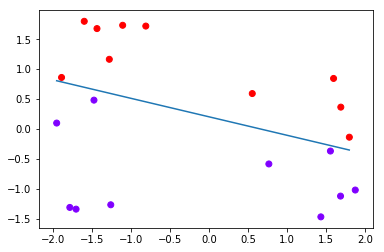

In [17]:
classify_plot(data2, x1, x2, w1, w2, bias)

### Data-3

In [18]:
x1, x2, w, y, bias = get_data(data3)
w1, w2, bias, err, y_hat = perceptron_predict_gd(x1, x2, y, w[0], w[1], bias, 1)
print_result(w1, w2, y_hat, err, bias)

w1 :  -3.71241950159
w2 :  6.23952532726
y_hat :  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]
squared error :  9
bias :  [-3.8040842]


### Classification plot

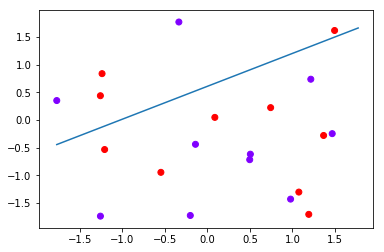

In [19]:
classify_plot(data3, x1, x2, w1, w2, bias)

### Data-4

In [20]:
x1, x2, w, y, bias = get_data(data4)
w1, w2, bias, err, y_hat = perceptron_predict_gd(x1, x2, y, w[0], w[1], bias, 1)
print_result(w1, w2, y_hat, err, bias)

w1 :  -0.168619155988
w2 :  16.3199381097
y_hat :  [1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0]
squared error :  0
bias :  [-3.01641959]


### Classification plot

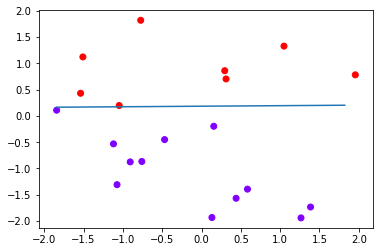

In [21]:
classify_plot(data4, x1, x2, w1, w2, bias)

## Stochastic Gradient Descent

In [47]:
%matplotlib nbagg

In [23]:
def get_data_sgd(data):
    w = np.random.sample(3)
    x = np.array([data.X1, data.X2, np.ones(len(data))])
    y = np.array(data.y)
    return x, w, y

In [24]:
def update_weight(x, w, y, y_hat, lrate):
    delta = lrate * (y - y_hat) * x
    w = w + delta
    return w

In [25]:
def predict_y(x, w):
    y_hat = np.dot(x, w.T)
    y_hat = 1 if y_hat >= 0 else 0
    return y_hat

In [45]:
def perceptron(x, w, y, lrate):
    y_hat = np.zeros(len(y))
    x_reshape = x.T
    all_weights = []
    error_sum = 0
    for i in range(20):
        for j in range(len(x_reshape)):
            y_hat[j] = predict_y(x_reshape[j], w)
            err = (y[j] - y_hat[j]) ** 2 
            error_sum += err
            if err != 0:
                w = update_weight(x_reshape[j], w, y[j], y_hat[j], lrate)
#         print(i)
        if error_sum == 0:
            break
        error_sum = 0
        all_weights.append(w)
    return all_weights, y_hat

In [27]:
def find_coordinates(x, w):
    x_plot = np.array([x[0].min(), x[1].max()])
    y_plot = (-w[-1][2] - np.dot(w[-1][0], x_plot)) / w[-1][1]
    return x_plot, y_plot

In [28]:
def classify_plot(data):
    plt.figure()
    plt.plot(x_plot, y_plot)
    label = data.y
    plt.scatter(data.X1, data.X2, c=label, cmap="rainbow")
    plt.show()

In [29]:
def animate(i, x_plot, y_plot, line):
    y_plot = (-w[i][2] - np.dot(w[i][0], x_plot)) / w[i][1]
    line.set_data(x_plot, y_plot)
    line.axes.axis([-2, 2, -2, 2])
    return line,

In [30]:
def animate_plot(data, i, x_plot, y_plot):
    fig, ax = plt.subplots()
    label = data.y
    plt.scatter(data.X1, data.X2, c=label, cmap="rainbow")
    line, = ax.plot(x_plot, y_plot)
    anim = animation.FuncAnimation(fig, animate, frames=len(w), fargs=[x_plot, y_plot, line], interval=500, blit=True)
    anim.save('data'+str(i)+'.gif')
    plt.show()

## Predict and Classify

### Data-1

In [53]:
x, w, y = get_data_sgd(data1)
w, y_hat = perceptron(x, w, y, 1)
print("Weights matrix : ", w[-1])
print("y : ", y)
print("y_hat : ", y_hat)

Weights matrix :  [ 0.58946581 -1.31260088  0.22555348]
y :  [1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0]
y_hat :  [ 1.  0.  0.  0.  1.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.  1.
  1.  1.]


### Classification plot

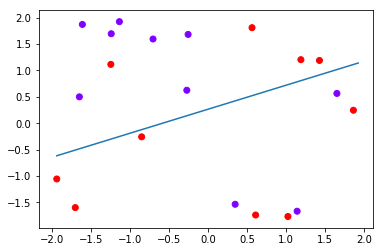

In [32]:
x_plot, y_plot = find_coordinates(x, w)
classify_plot(data1)

### Animation plot

<IPython.core.display.Javascript object>


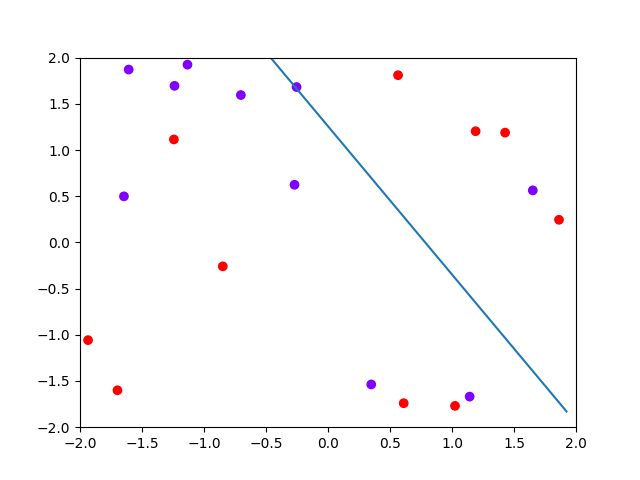

/home/user/dummy/lib/python3.5/site-packages/matplotlib/animation.py:971: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


In [55]:
animate_plot(data1, 1, x_plot, y_plot)

### Data-2

In [50]:
x, w, y = get_data_sgd(data2)
w, y_hat = perceptron(x, w, y, 1)
print("Weights matrix : ", w[-1])
print("y : ", y)
print("y_hat : ", y_hat)

Weights matrix :  [ 1.40031273  4.94958517 -1.56151636]
y :  [1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0]
y_hat :  [ 1.  0.  0.  1.  0.  0.  0.  1.  0.  1.  1.  1.  0.  1.  1.  1.  0.  1.
  0.  0.]


### Classification plot

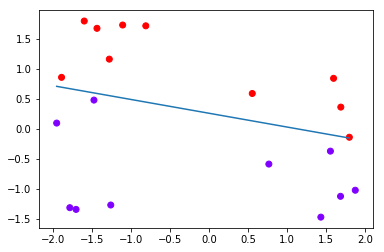

In [35]:
x_plot, y_plot = find_coordinates(x, w)
classify_plot(data2)

### Animation plot

<IPython.core.display.Javascript object>


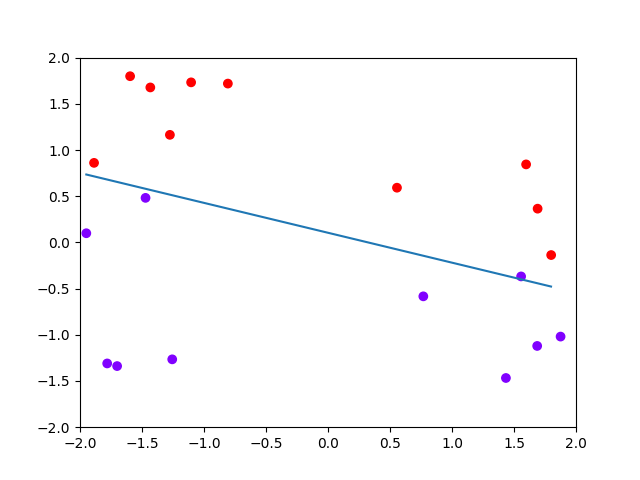

/home/user/dummy/lib/python3.5/site-packages/matplotlib/animation.py:971: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


In [52]:
animate_plot(data2, 2, x_plot, y_plot)

### Data-3

In [56]:
x, w, y = get_data_sgd(data3)
w, y_hat = perceptron(x, w, y, 1)
print("Weights matrix : ", w[-1])
print("y : ", y)
print("y_hat : ", y_hat)

Weights matrix :  [ 1.56890479  0.97784578 -1.22925283]
y :  [0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0]
y_hat :  [ 1.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0.  1.  1.  1.  0.  1.  1.  0.
  0.  1.]


### Classification plot

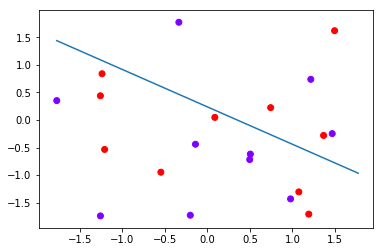

In [38]:
x_plot, y_plot = find_coordinates(x, w)
classify_plot(data3)

### Animation plot

In [ ]:
animate_plot(data3, 3, x_plot, y_plot)

<IPython.core.display.Javascript object>

/home/user/dummy/lib/python3.5/site-packages/matplotlib/animation.py:971: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


### Data-4

In [60]:
x, w, y = get_data_sgd(data4)
w, y_hat = perceptron(x, w, y, 1)
print("Weights matrix : ", w[-1])
print("y : ", y)
print("y_hat : ", y_hat)

Weights matrix :  [ 0.42648393  3.29369591  0.13019136]
y :  [1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0]
y_hat :  [ 1.  0.  1.  0.  0.  1.  0.  1.  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.
  0.  0.]


### Classification plot

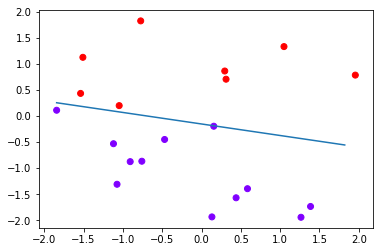

In [41]:
x_plot, y_plot = find_coordinates(x, w)
classify_plot(data4)

### Animation plot

<IPython.core.display.Javascript object>


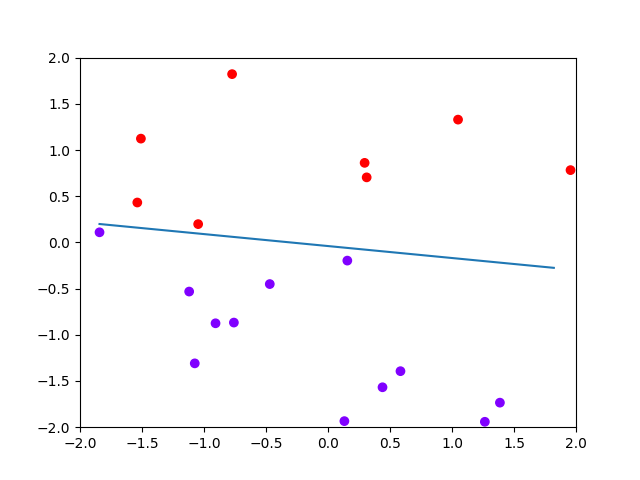

/home/user/dummy/lib/python3.5/site-packages/matplotlib/animation.py:971: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


In [62]:
animate_plot(data4, 4, x_plot, y_plot)